**HOW TO CALL THE CLASS FROM YOUR NOTEBOOK**

In [12]:
from api.mapbox_api import MapboxAPI
import requests
from urllib.request import urlopen
import json
from shapely.geometry import shape, Polygon

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

In [13]:
branches = pd.read_csv('../data/clean/branches.csv')
populationDemographics = pd.read_csv('../data/clean/education_demographics.csv')

In [14]:
api = MapboxAPI()

In [15]:
response = api.get_data((41.97557881655979, -87.71361314512697), 15)
response

{'coordinates': [[[-87.713613, 41.987167],
   [-87.716613, 41.985401],
   [-87.719474, 41.982579],
   [-87.721072, 41.981579],
   [-87.721054, 41.977579],
   [-87.719264, 41.976928],
   [-87.719293, 41.976258],
   [-87.72827, 41.976236],
   [-87.729052, 41.975579],
   [-87.728472, 41.97472],
   [-87.727059, 41.974133],
   [-87.725613, 41.97225],
   [-87.718613, 41.967294],
   [-87.715613, 41.965491],
   [-87.714499, 41.965693],
   [-87.714389, 41.964803],
   [-87.713613, 41.964035],
   [-87.708613, 41.966886],
   [-87.704613, 41.97037],
   [-87.703426, 41.970392],
   [-87.700289, 41.973579],
   [-87.699843, 41.974808],
   [-87.698131, 41.975579],
   [-87.700613, 41.97817],
   [-87.702613, 41.978675],
   [-87.704361, 41.979831],
   [-87.705613, 41.980048],
   [-87.706613, 41.979057],
   [-87.707706, 41.979486],
   [-87.707835, 41.983357],
   [-87.713613, 41.987167]]],
 'type': 'Polygon'}

In [16]:
branchRadii = gpd.read_file('../data/clean/branches.csv')

branchRadii[['LATITUDE', 'LONGITUDE']] = [ast.literal_eval(x)[:2] for x in branchRadii['LOCATION']]
branchRadii.loc[:, 'LATITUDE'] = pd.to_numeric(branchRadii.loc[:, 'LATITUDE'])
branchRadii.loc[:, 'LONGITUDE'] = pd.to_numeric(branchRadii.loc[:, 'LONGITUDE'])
branchRadii.head()


,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED,geometry,LATITUDE,LONGITUDE
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0,None,41.975579,-87.713613
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65719847558056, -87.59883829075173)",0,None,41.657198,-87.598838
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.80110836194246, -87.72648385568911)",0,None,41.801108,-87.726484
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.88917312206642, -87.7658203582574)",0,None,41.889173,-87.765820
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95312267684315, -87.77928489355646)",0,None,41.953123,-87.779285


In [17]:
for i in range(0, 82):
    api_response = api.get_data((branchRadii.loc[i,'LATITUDE'],branchRadii.loc[i,'LONGITUDE']), 15)
    branchRadii.loc[i,'geometry'] = shape(api_response)

branchRadii

,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED,geometry,LATITUDE,LONGITUDE
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0,"POLYGON ((-87.71361 41.98717, -87.71661 41.985...",41.975579,-87.713613
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65719847558056, -87.59883829075173)",0,"POLYGON ((-87.59784 41.66362, -87.59868 41.663...",41.657198,-87.598838
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.80110836194246, -87.72648385568911)",0,"POLYGON ((-87.72648 41.81232, -87.72822 41.811...",41.801108,-87.726484
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.88917312206642, -87.7658203582574)",0,"POLYGON ((-87.76582 41.90056, -87.76782 41.899...",41.889173,-87.765820
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95312267684315, -87.77928489355646)",0,"POLYGON ((-87.77929 41.96473, -87.78109 41.963...",41.953123,-87.779285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,West Pullman,"Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...",830 W. 119th St.,Chicago,IL,60643,(312) 747-1425,https://www.chipublib.org/locations/78/,"(41.67790647382097, -87.6431683153105)",0,"POLYGON ((-87.64117 41.68809, -87.64217 41.688...",41.677906,-87.643168
78,West Town,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",1625 W. Chicago Ave.,Chicago,IL,60622,(312) 743-0450,https://www.chipublib.org/locations/79/,"(41.89594730478282, -87.66829305460979)",0,"POLYGON ((-87.66729 41.90712, -87.66929 41.906...",41.895947,-87.668293
79,"Whitney M. Young, Jr.","Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",415 East 79th St.,Chicago,IL,60619,(312) 747-0039,https://www.chipublib.org/locations/80/,"(41.7510184591363, -87.61495065361933)",0,"POLYGON ((-87.61495 41.76288, -87.62695 41.753...",41.751018,-87.614951
80,Woodson Regional Library,"Mon. - Thurs., 9-8; Fri. & Sat., 9-5; Sun., 1-5",9525 S. Halsted St.,Chicago,IL,60628,(312) 747-6900,https://www.chipublib.org/locations/81/,"(41.720694885749005, -87.64304817213312)",0,"POLYGON ((-87.64305 41.73233, -87.64405 41.732...",41.720695,-87.643048


/tmp/ipykernel_1456932/524419593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
/tmp/ipykernel_1456932/524419593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]


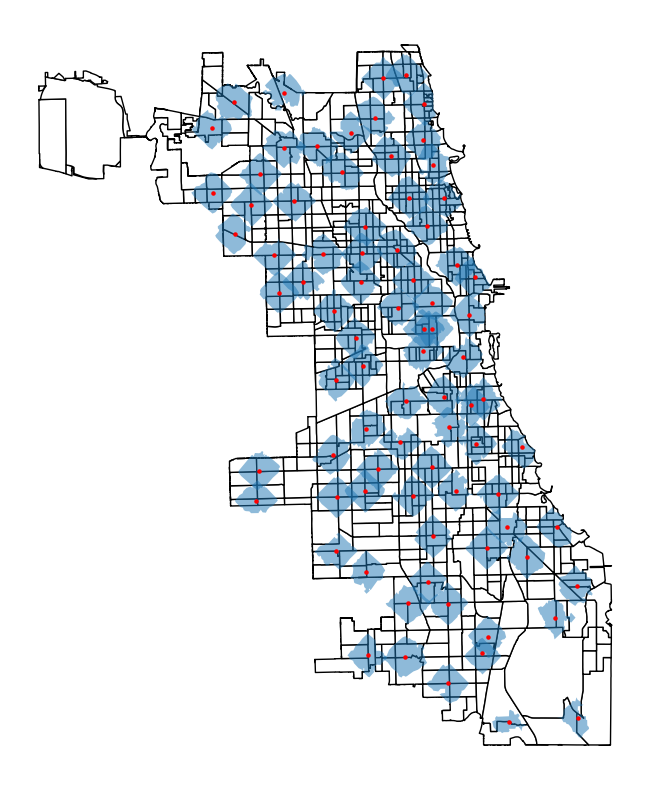

In [18]:
# this line makes a copy of the ageOnly data frame so we can manipulate without affecting our primary dataset
censusTracts = populationDemographics[['geoid','geometry','qualifying name']]
branchLocsOnly=branches[['BRANCH','LOCATION']]

# the following converts the data frame to a geo data frame and plots estimated percent of retired members of each community
censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )

branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')
#branchLocsOnly.head()

branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")


fig, ax = plt.subplots(1, figsize=(10, 10))
base = censusTracts.plot(ax=ax, color='white', edgecolor='black')
ax.axis('off')

branchRadii.plot(ax=base, alpha = .5)
branchLocsOnly.plot(ax=base, marker='o', color='red', markersize=5);

In [19]:
#branchRadii.intersection(branchRadii, align=True)
print(censusTracts.shape[0])
censusTracts0to81 = censusTracts.loc[0:82]
censusTracts82to193 = censusTracts.loc[82:194]
censusTracts194to275 = censusTracts.loc[194:276]
censusTracts275to356 = censusTracts.loc[275:357]
censusTracts357to438 = censusTracts.loc[357:439]
censusTracts439to = censusTracts.loc[357:439]

869
